In [46]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [47]:
x, y, z = [np.fromfile(f, dtype=np.float32) for f in sorted(glob("../*/*grid_geom*"))[:3]]
ni, nj, nk = x.shape[0]-1, y.shape[0]-1, z.shape[0]-1

In [48]:
ni, nj, nk

(72, 72, 68)

In [49]:
drdt = np.fromfile("../build/test_convection_masse/test_convection_masse_lata_1.sauv.lata.0.DRHO_DT", dtype=np.float32).reshape(ni, nj, nk, order="F")
drdt_old = np.fromfile("../build.save/test_convection_masse/test_convection_masse_lata_1.sauv.lata.0.DRHO_DT", dtype=np.float32).reshape(ni, nj, nk, order="F")
drdt_true = np.fromfile("../true/test_convection_masse_lata_1.sauv.lata.0.DRHO_DT", dtype=np.float32).reshape(ni, nj, nk, order="F")

# On plot $$\frac{\partial \rho}{\partial t}$$

Plus précisément $$
\rho^{n+1} = - \Delta_t[\nabla \cdot (\rho^{n}U^n) ] + \rho^n
$$

Le schémas de discrétisation utilisé dans cet exemple est QUICK

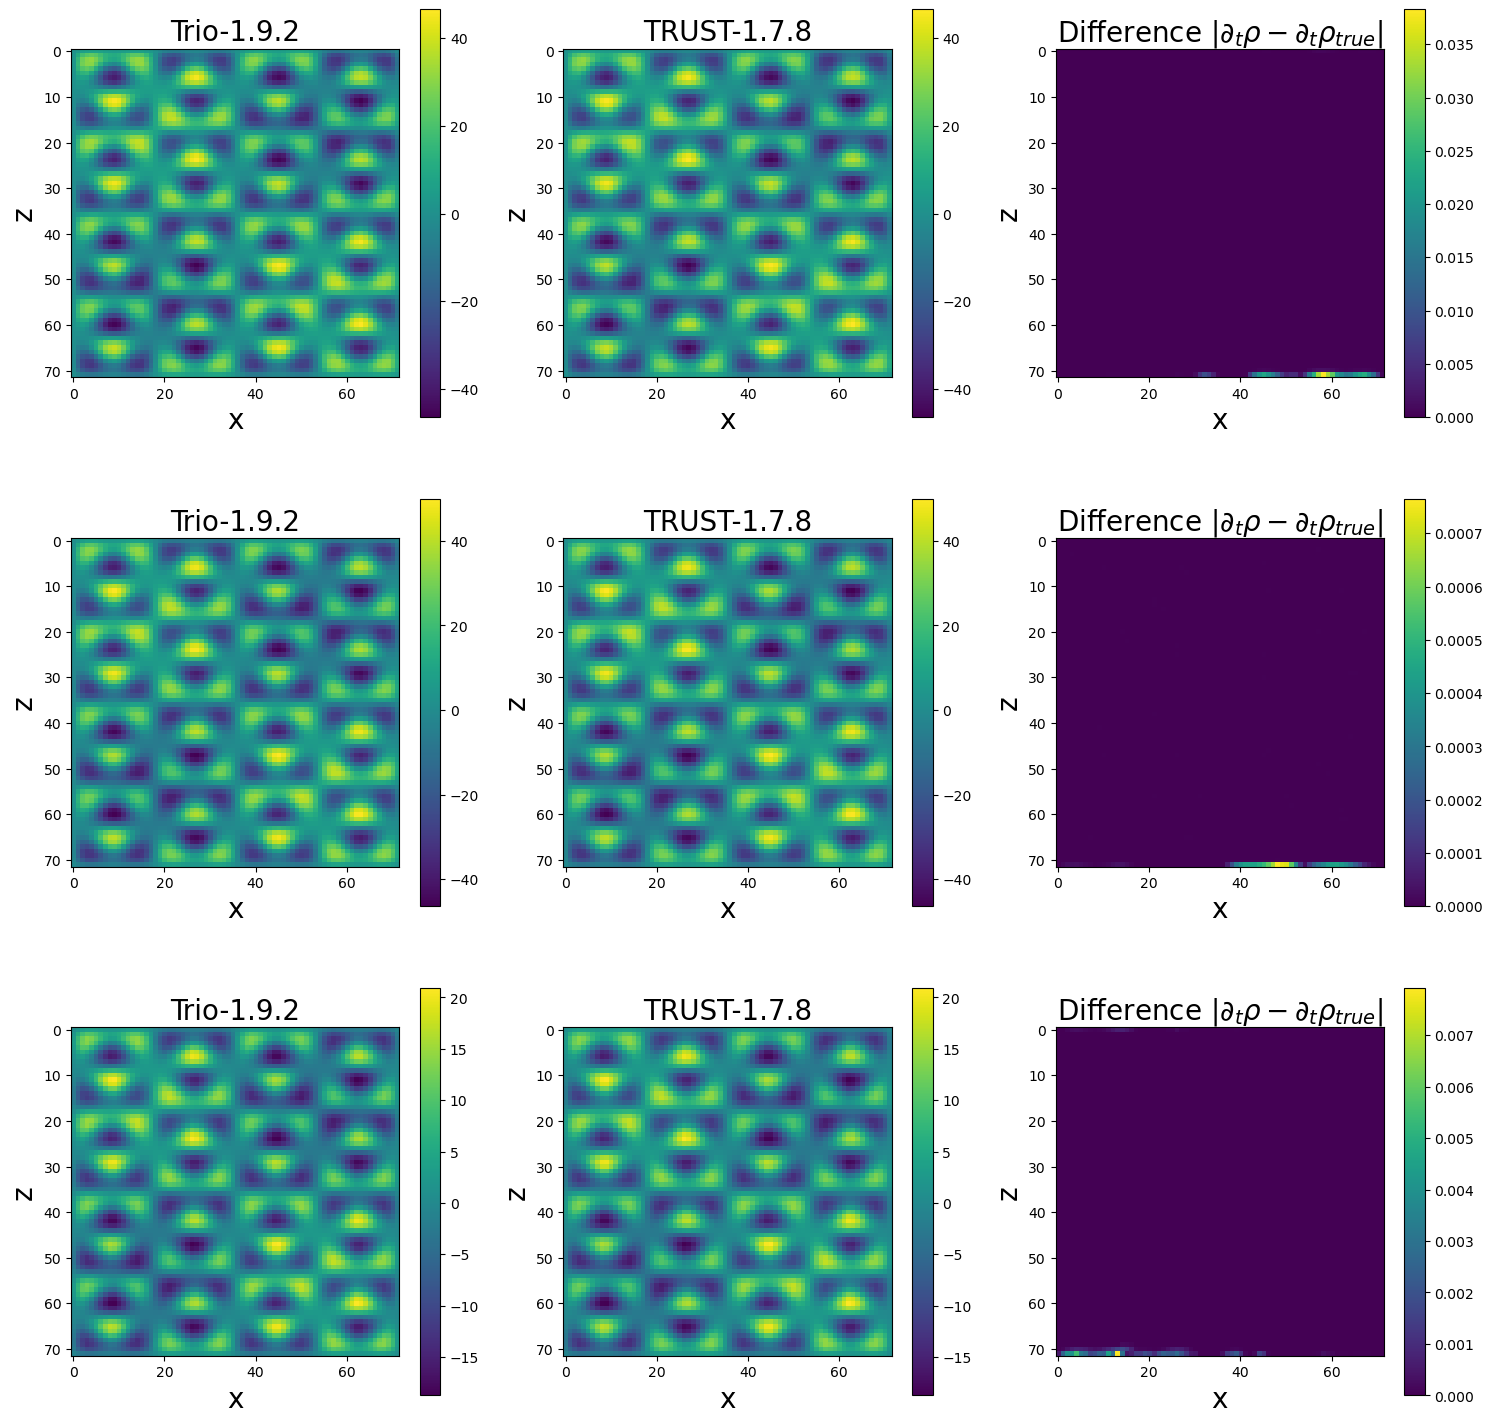

In [45]:
channel_height = nk//4
fig, ax = plt.subplots(3, 3, figsize=(6*3, 6*3))
im0=ax[0][0].imshow(drdt[..., channel_height].T)
ax[0][0].set_title("Trio-1.9.2", fontsize=20)
ax[0][0].set_xlabel("x", fontsize=20)
ax[0][0].set_ylabel("z", fontsize=20)

im1=ax[0][1].imshow(drdt_true[..., channel_height].T)
ax[0][1].set_title("TRUST-1.7.8", fontsize=20)
ax[0][1].set_xlabel("x", fontsize=20)
ax[0][1].set_ylabel("z", fontsize=20)

im2=ax[0][2].imshow(np.abs(drdt[..., channel_height].T - drdt_true[..., channel_height].T))
ax[0][2].set_title(r"Difference $| \partial_t \rho - \partial_t \rho_{true}| $", fontsize=20)
ax[0][2].set_xlabel("x", fontsize=20)
ax[0][2].set_ylabel("z", fontsize=20)
fig.colorbar(im0, ax=ax[0][0])
fig.colorbar(im1, ax=ax[0][1])
fig.colorbar(im2, ax=ax[0][2])

channel_height = nk//2
im0=ax[1][0].imshow(drdt[..., channel_height].T)
ax[1][0].set_title("Trio-1.9.2", fontsize=20)
ax[1][0].set_xlabel("x", fontsize=20)
ax[1][0].set_ylabel("z", fontsize=20)

im1=ax[1][1].imshow(drdt_true[..., channel_height].T)
ax[1][1].set_title("TRUST-1.7.8", fontsize=20)
ax[1][1].set_xlabel("x", fontsize=20)
ax[1][1].set_ylabel("z", fontsize=20)

im2=ax[1][2].imshow(np.abs(drdt[..., channel_height].T - drdt_true[..., channel_height].T))
ax[1][2].set_title(r"Difference $| \partial_t \rho - \partial_t \rho_{true}| $", fontsize=20)
ax[1][2].set_xlabel("x", fontsize=20)
ax[1][2].set_ylabel("z", fontsize=20)

fig.colorbar(im0, ax=ax[1][0])
fig.colorbar(im1, ax=ax[1][1])
fig.colorbar(im2, ax=ax[1][2])

channel_height=3*nk//4
im0=ax[2][0].imshow(drdt[..., channel_height].T)
ax[2][0].set_title("Trio-1.9.2", fontsize=20)
ax[2][0].set_xlabel("x", fontsize=20)
ax[2][0].set_ylabel("z", fontsize=20)

im1=ax[2][1].imshow(drdt_true[..., channel_height].T)
ax[2][1].set_title("TRUST-1.7.8", fontsize=20)
ax[2][1].set_xlabel("x", fontsize=20)
ax[2][1].set_ylabel("z", fontsize=20)

im2=ax[2][2].imshow(np.abs(drdt[..., channel_height].T - drdt_true[..., channel_height].T))
ax[2][2].set_title(r"Difference $| \partial_t \rho - \partial_t \rho_{true}| $", fontsize=20)
ax[2][2].set_xlabel("x", fontsize=20)
ax[2][2].set_ylabel("z", fontsize=20)

fig.colorbar(im0, ax=ax[2][0])
fig.colorbar(im1, ax=ax[2][1])
fig.colorbar(im2, ax=ax[2][2])


On peut voir une erreur pour $z=zmax$ qui est significative pour toutes les hauteurs plot. On peut s'y intéresser avec des plots en fonction de x

In [9]:
ni, nj, nk

(72, 72, 68)

In [10]:
def middle_point(x):
    return (x[1:] + x[:-1])*.5
x_m = x_mid = middle_point(x)

In [29]:
channel_height == nk//2

False

In [27]:
np.abs(drdt[..., channel_height].T - drdt_true[..., channel_height].T).shape

(72, 72)

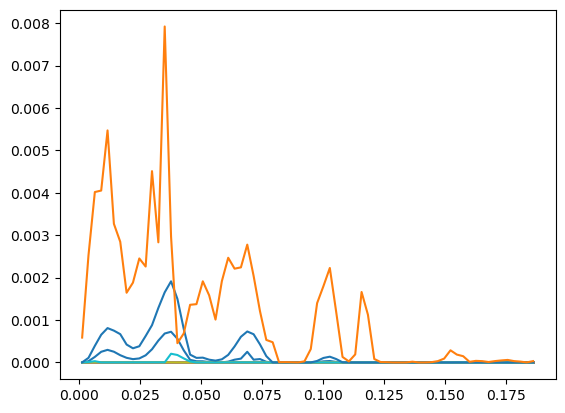

In [32]:
plt.plot(x_m, np.abs(drdt[..., channel_height] - drdt_true[..., channel_height]))

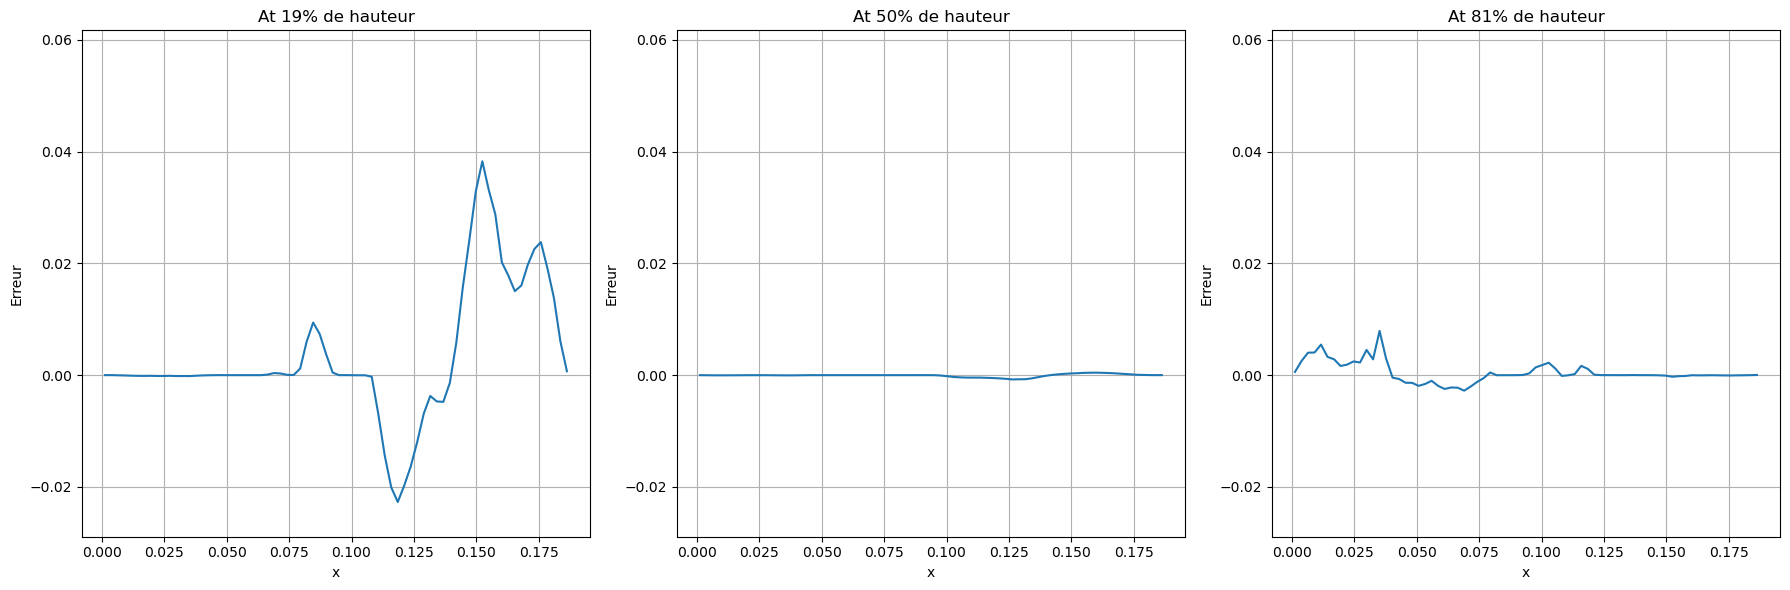

In [21]:
# Dernier index de z
diff = (drdt - drdt_true)[..., -1, :]
diff_abs = np.abs(diff)

fig, ax = plt.subplots(1, 3, figsize=(6*3, 6))

channel_height = nk//4
ax[0].plot(x_mid, diff[..., channel_height])
ax[0].set_xlabel("x")
ax[0].set_ylabel("Erreur")
ax[0].set_title(f"At {z[channel_height]/z[-1]*100:.0f}% de hauteur")
ax[0].set_ylim([diff.min(), diff.max()])

channel_height = nk//2
ax[1].plot(x_mid, diff[..., channel_height])
ax[1].set_xlabel("x")
ax[1].set_ylabel("Erreur")
ax[1].set_title(f"At {z[channel_height]/z[-1]*100:.0f}% de hauteur")
ax[1].set_ylim([diff.min(), diff.max()])

channel_height=3*nk//4
ax[2].plot(x_mid, diff[..., channel_height])
ax[2].set_xlabel("x")
ax[2].set_ylabel("Erreur")
ax[2].set_title(f"At {z[channel_height]/z[-1]*100:.0f}% de hauteur")
ax[2].set_ylim([diff.min(), diff.max()])

for a in ax:
    a.grid("both")
    
plt.tight_layout()

Ainsi que l'erreur moyenne, en moyennant par rapport à la hauteur dans le canal

Text(0, 0.5, 'Erreur')

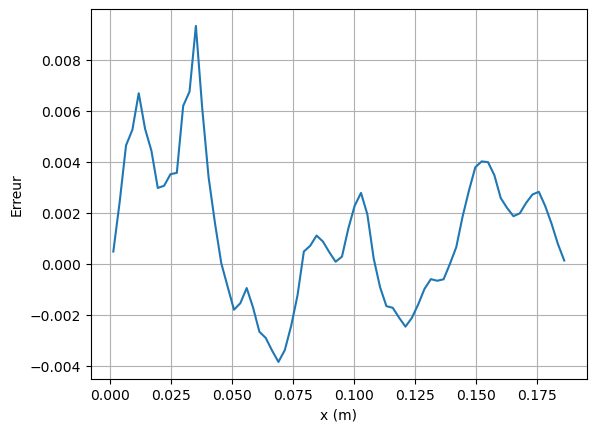

In [24]:
y_m = middle_point(y)
z_m = middle_point(z)
erreur_moyenne = np.average(diff, axis=-1, weights=z_m)
plt.plot(x_m, erreur_moyenne)
plt.grid("both")
plt.xlabel("x (m)")
plt.ylabel("Erreur")

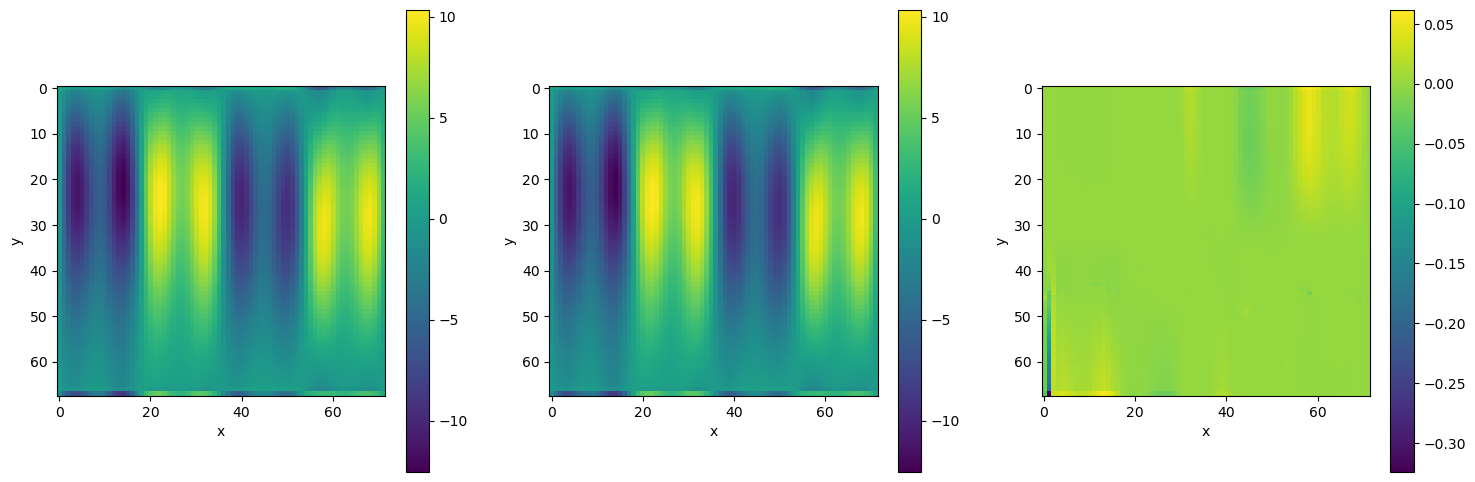

In [58]:
fig, ax = plt.subplots(1, 3, figsize=(6*3, 6))

im0 = ax[0].imshow(drdt[:, -1].T)
im1 = ax[1].imshow(drdt_true[:, -1].T)
im2 = ax[2].imshow((drdt[:, -1] - drdt_true[:, -1]).T)

for a in ax:
    a.set_xlabel("x")
    a.set_ylabel("y")
    

fig.colorbar(im0, ax=ax[0])
fig.colorbar(im1, ax=ax[1])
fig.colorbar(im2, ax=ax[2])

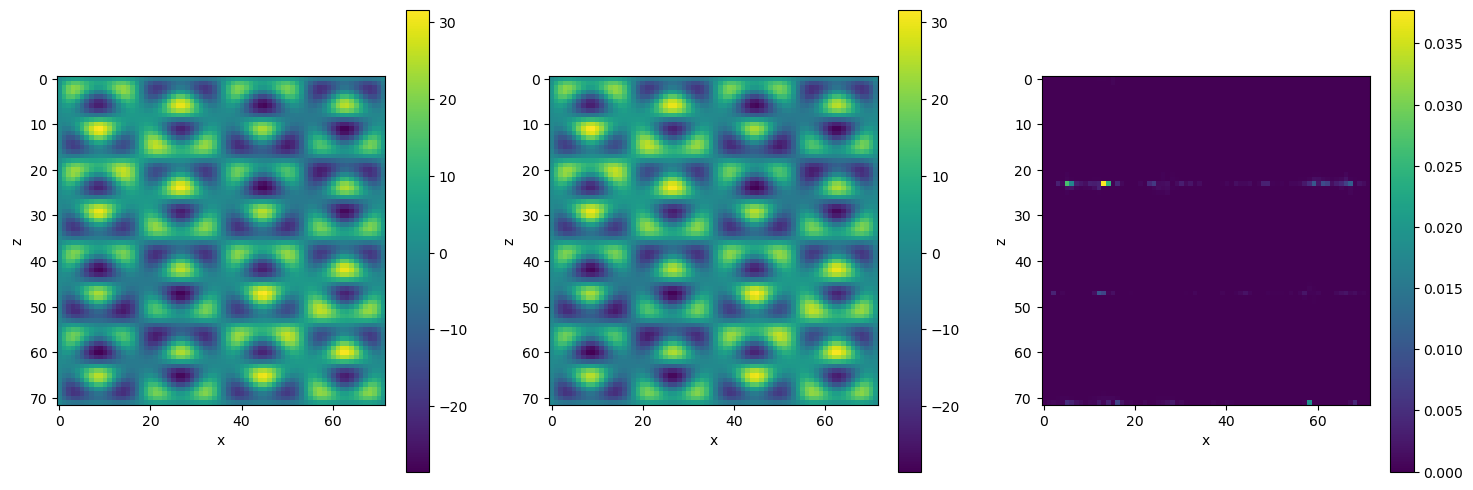

In [67]:
drdt = np.fromfile("../build/test_convection_masse/test_convection_masse_lata_1.sauv.lata.0.DRHO_DT", dtype=np.float32).reshape(ni, nj, nk, order="F")
drdt_old = np.fromfile("../build.save/test_convection_masse/test_convection_masse_lata_1.sauv.lata.0.DRHO_DT", dtype=np.float32).reshape(ni, nj, nk, order="F")
drdt_true = np.fromfile("../true/test_convection_masse_lata_1.sauv.lata.0.DRHO_DT", dtype=np.float32).reshape(ni, nj, nk, order="F")

fig, ax = plt.subplots(1, 3, figsize=(6*3, 6))
channel_height = 8*nk//12
im0 = ax[0].imshow(drdt[..., channel_height].T)
im1 = ax[1].imshow(drdt_true[..., channel_height].T)
im2 = ax[2].imshow(np.abs(drdt[..., channel_height] - drdt_true[..., channel_height]).T)

for a in ax:
    a.set_xlabel("x")
    a.set_ylabel("z")
    

fig.colorbar(im0, ax=ax[0])
fig.colorbar(im1, ax=ax[1])
fig.colorbar(im2, ax=ax[2])

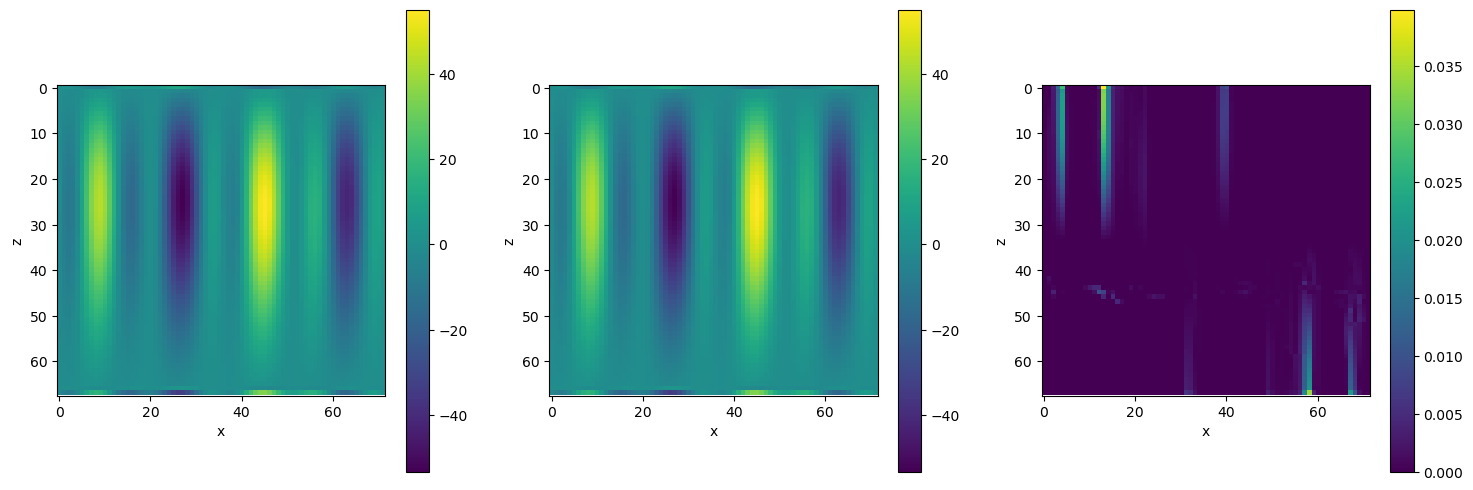

In [75]:
drdt = np.fromfile("../build/test_convection_masse/test_convection_masse_lata_1.sauv.lata.0.DRHO_DT", dtype=np.float32).reshape(ni, nj, nk, order="F")
drdt_old = np.fromfile("../build.save/test_convection_masse/test_convection_masse_lata_1.sauv.lata.0.DRHO_DT", dtype=np.float32).reshape(ni, nj, nk, order="F")
drdt_true = np.fromfile("../true/test_convection_masse_lata_1.sauv.lata.0.DRHO_DT", dtype=np.float32).reshape(ni, nj, nk, order="F")

fig, ax = plt.subplots(1, 3, figsize=(6*3, 6))
channel_height = 8*nk//12
im0 = ax[0].imshow(drdt[..., -1+2*nj//3,:].T)
im1 = ax[1].imshow(drdt_true[..., -1+2*nj//3,:].T)
im2 = ax[2].imshow(np.abs(drdt[..., -1+2*nj//3,:] - drdt_true[..., -1+2*nj//3,:]).T)

for a in ax:
    a.set_xlabel("x")
    a.set_ylabel("z")
    

fig.colorbar(im0, ax=ax[0])
fig.colorbar(im1, ax=ax[1])
fig.colorbar(im2, ax=ax[2])

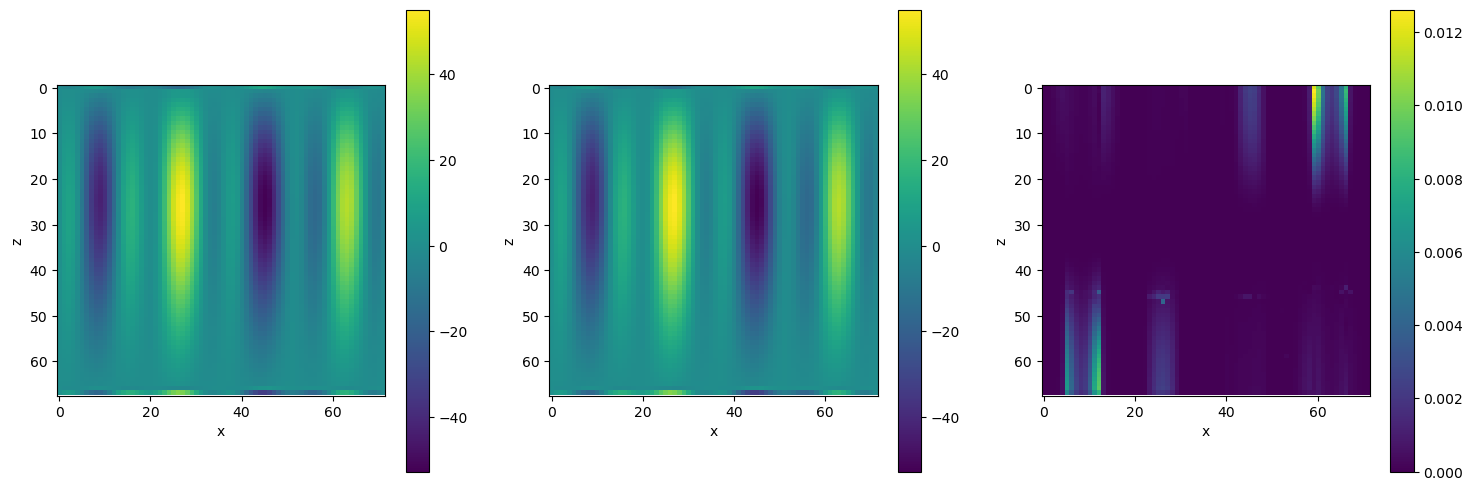

In [77]:
fig, ax = plt.subplots(1, 3, figsize=(6*3, 6))
channel_height = 8*nk//12
im0 = ax[0].imshow(drdt[..., 1*nj//3,:].T)
im1 = ax[1].imshow(drdt_true[..., 1*nj//3,:].T)
im2 = ax[2].imshow(np.abs(drdt[..., 1*nj//3,:] - drdt_true[..., 1*nj//3,:]).T)

for a in ax:
    a.set_xlabel("x")
    a.set_ylabel("z")
    

fig.colorbar(im0, ax=ax[0])
fig.colorbar(im1, ax=ax[1])
fig.colorbar(im2, ax=ax[2])

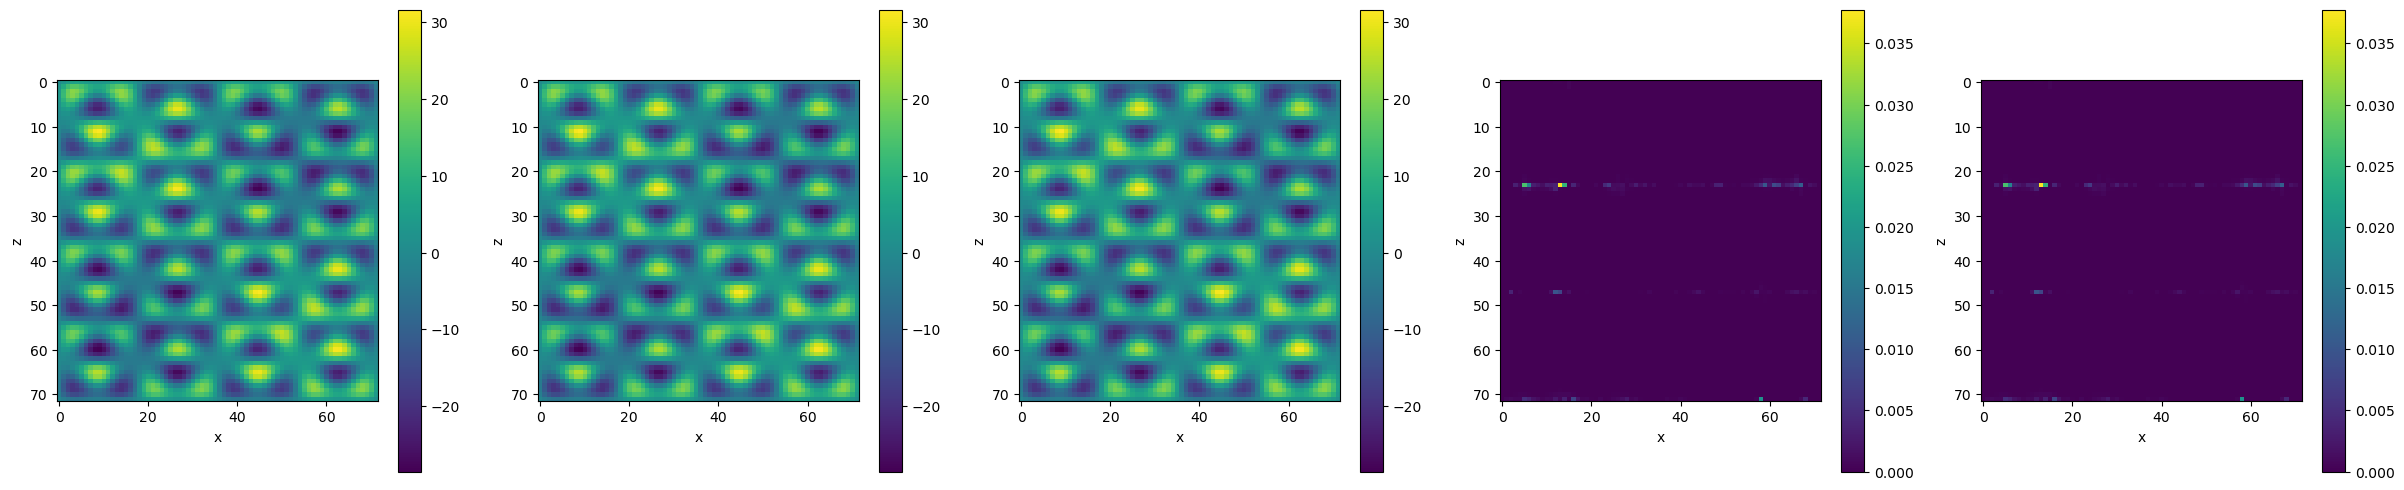

In [83]:
drdt = np.fromfile("../build/test_convection_masse/test_convection_masse_lata_1.sauv.lata.0.DRHO_DT", dtype=np.float32).reshape(ni, nj, nk, order="F")
drdt_1_proc_nouveau = np.fromfile("../build.save/test_convection_masse/test_convection_masse_lata_1.sauv.lata.0.DRHO_DT", dtype=np.float32).reshape(ni, nj, nk, order="F")

drdt_true_1_proc = drdt_old_1_proc = np.fromfile("../true/test_convection_masse_lata_1.sauv.lata.0.DRHO_DT", dtype=np.float32).reshape(ni, nj, nk, order="F")
drdt_true_debug = np.fromfile("../true_debug/test_convection_masse_lata_1.sauv.lata.0.DRHO_DT", dtype=np.float32).reshape(ni, nj, nk, order="F")

fig, ax = plt.subplots(1, 5, figsize=(6*5, 6))
channel_height = 8*nk//12
im0 = ax[0].imshow(drdt[..., channel_height].T)
im1 = ax[1].imshow(drdt_true[..., channel_height].T)
im2 = ax[2].imshow(drdt_true_debug[..., channel_height].T)
im3 = ax[3].imshow(np.abs(drdt[..., channel_height] - drdt_true[..., channel_height]).T)
im4 = ax[4].imshow(np.abs(drdt[..., channel_height] - drdt_true_debug[..., channel_height]).T)

for a in ax:
    a.set_xlabel("x")
    a.set_ylabel("z")
    

fig.colorbar(im0, ax=ax[0])
fig.colorbar(im1, ax=ax[1])
fig.colorbar(im2, ax=ax[2])
fig.colorbar(im3, ax=ax[3])
fig.colorbar(im4, ax=ax[4])

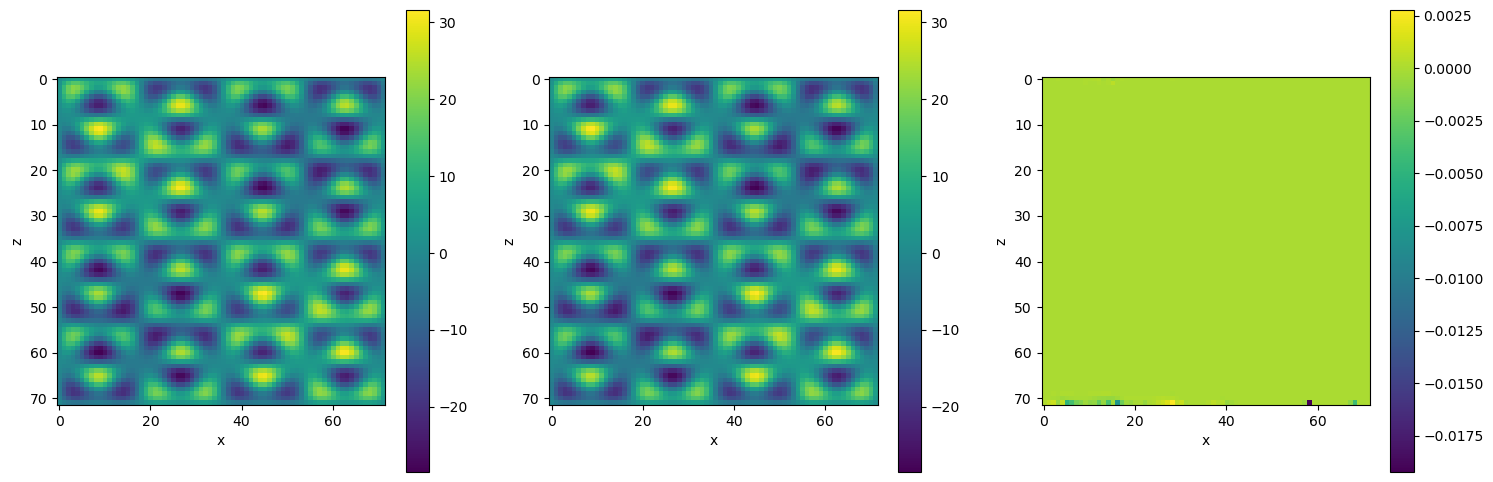

In [85]:
fig, ax = plt.subplots(1, 3, figsize=(6*3, 6))
channel_height = 8*nk//12

for a in ax:
    a.set_xlabel("x")
    a.set_ylabel("z")


im0 = ax[0].imshow(drdt_1_proc_nouveau[..., channel_height].T)
im1 = ax[1].imshow(drdt_true_1_proc[..., channel_height].T)
im3 = ax[2].imshow(drdt_1_proc_nouveau[..., channel_height].T - drdt_true_1_proc[..., channel_height].T)

fig.colorbar(im0, ax = ax[0])
fig.colorbar(im1, ax = ax[1])
fig.colorbar(im3, ax = ax[2])

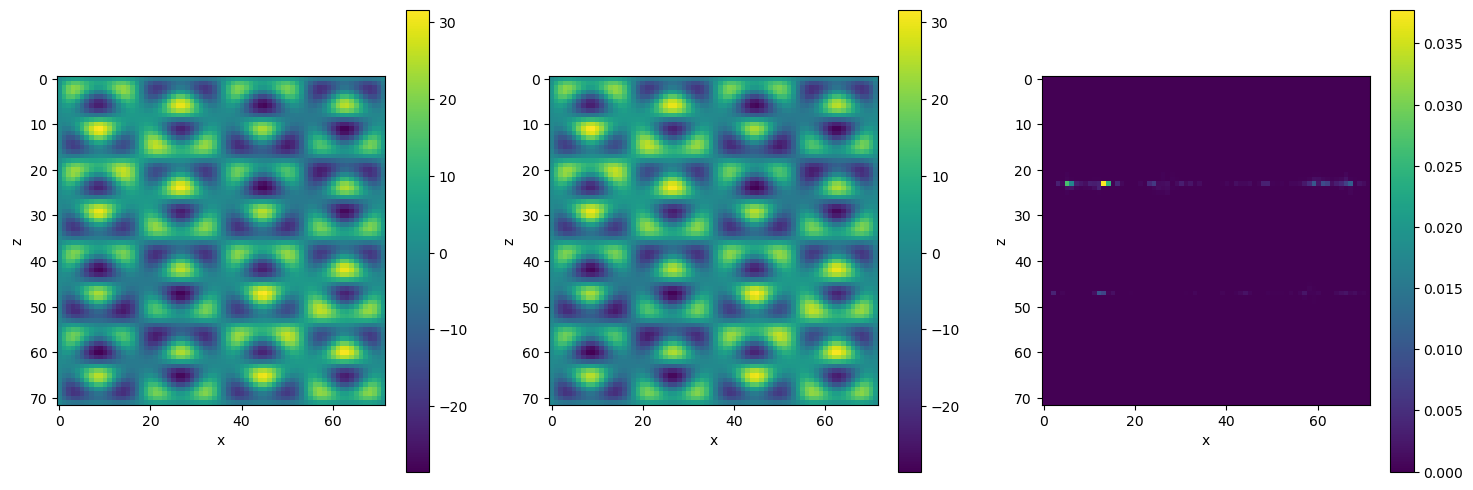

In [87]:
fig, ax = plt.subplots(1, 3, figsize=(6*3, 6))
channel_height = 8*nk//12

for a in ax:
    a.set_xlabel("x")
    a.set_ylabel("z")


im0 = ax[0].imshow(drdt_1_proc_nouveau[..., channel_height].T)
im1 = ax[1].imshow(drdt[..., channel_height].T)
im3 = ax[2].imshow(np.abs(drdt_1_proc_nouveau[..., channel_height].T - drdt[..., channel_height].T))

fig.colorbar(im0, ax = ax[0])
fig.colorbar(im1, ax = ax[1])
fig.colorbar(im3, ax = ax[2])

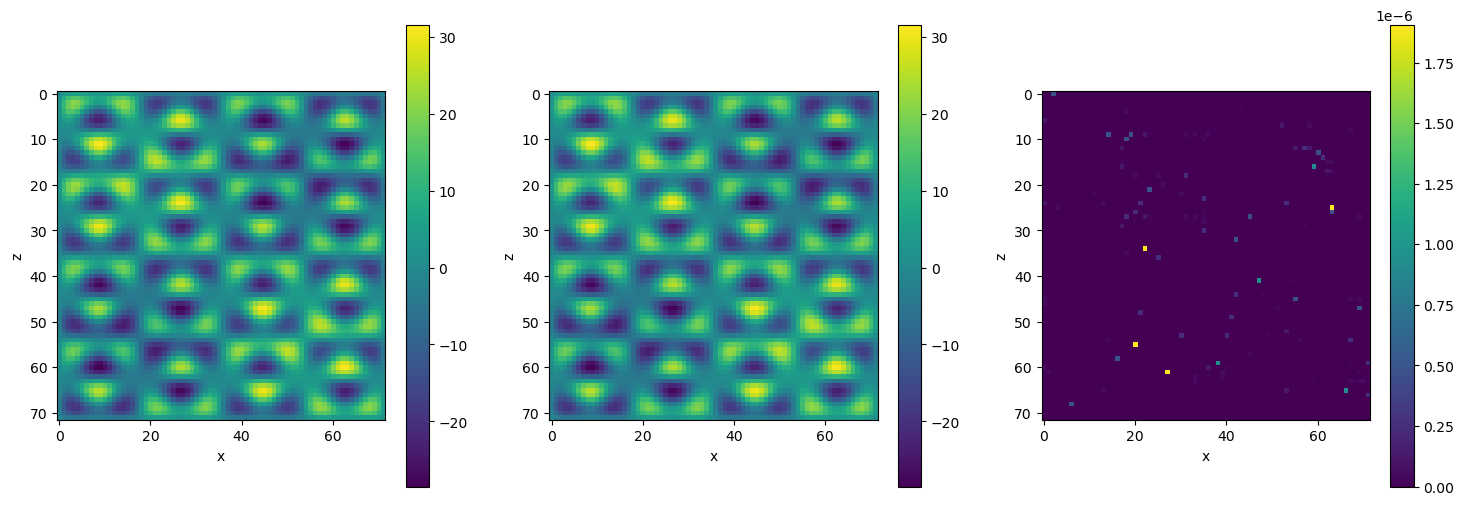

In [88]:
fig, ax = plt.subplots(1, 3, figsize=(6*3, 6))
channel_height = 8*nk//12

for a in ax:
    a.set_xlabel("x")
    a.set_ylabel("z")


im0 = ax[0].imshow(drdt_true_1_proc[..., channel_height].T)
im1 = ax[1].imshow(drdt_true_debug[..., channel_height].T)
im3 = ax[2].imshow(np.abs(drdt_true_1_proc[..., channel_height].T - drdt_true_debug[..., channel_height].T))

fig.colorbar(im0, ax = ax[0])
fig.colorbar(im1, ax = ax[1])
fig.colorbar(im3, ax = ax[2])

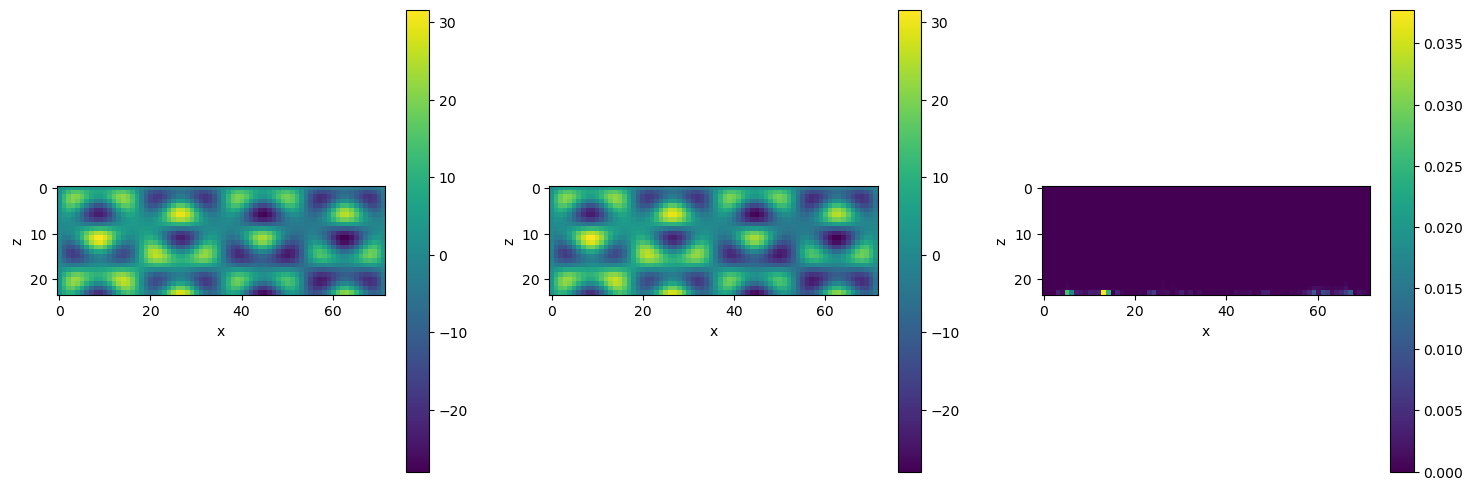

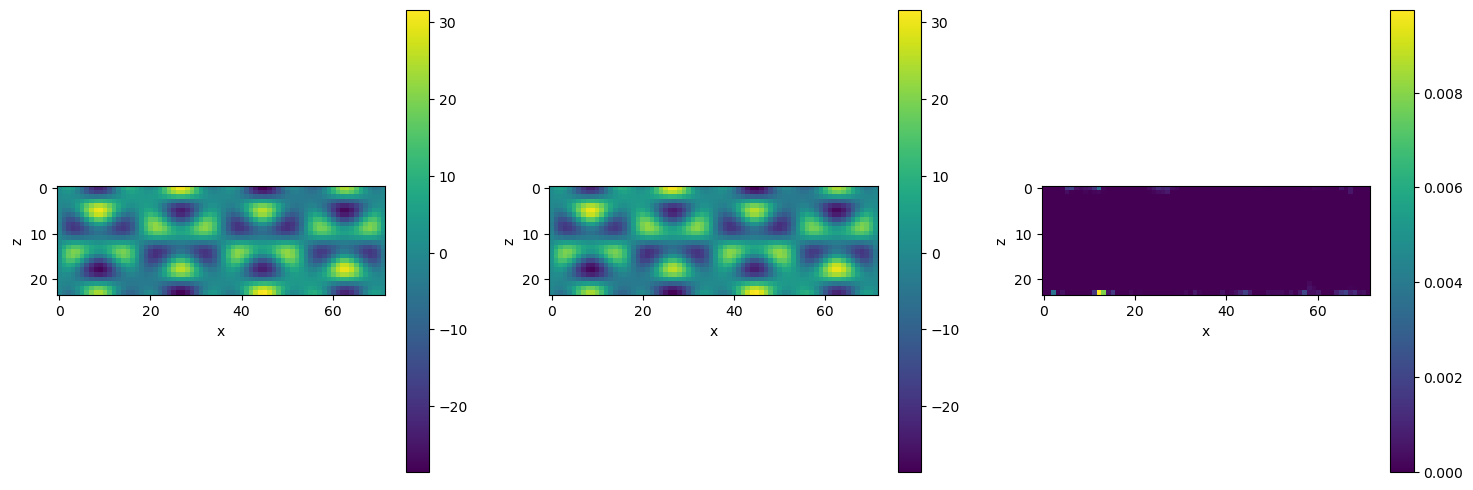

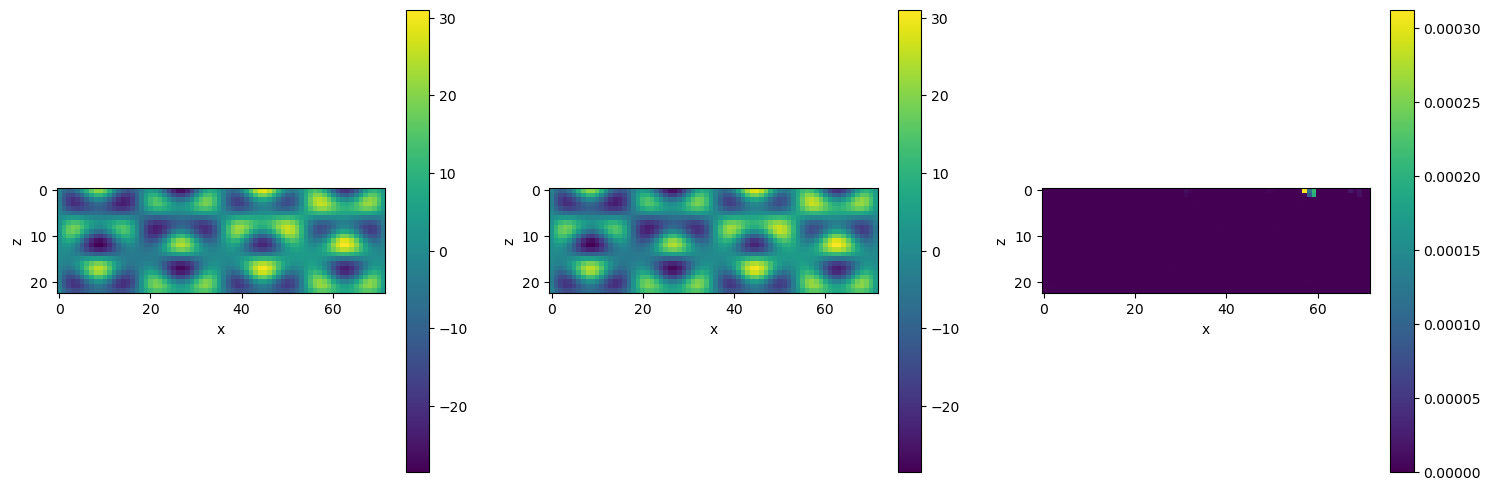

In [101]:
fig, ax = plt.subplots(1, 3, figsize=(6*3, 6))
channel_height = 8*nk//12

for a in ax:
    a.set_xlabel("x")
    a.set_ylabel("z")

nj_begin, nj_end = 0, 24
im0 = ax[0].imshow(drdt_1_proc_nouveau[..., nj_begin:nj_end, channel_height].T)
im1 = ax[1].imshow(drdt[..., nj_begin:nj_end, channel_height].T)
im3 = ax[2].imshow(np.abs(drdt_1_proc_nouveau[..., nj_begin:nj_end, channel_height].T - drdt[..., nj_begin:nj_end, channel_height].T))

fig.colorbar(im0, ax = ax[0])
fig.colorbar(im1, ax = ax[1])
fig.colorbar(im3, ax = ax[2])

fig, ax = plt.subplots(1, 3, figsize=(6*3, 6))
channel_height = 8*nk//12

for a in ax:
    a.set_xlabel("x")
    a.set_ylabel("z")

nj_begin, nj_end = 24, 47+1
im0 = ax[0].imshow(drdt_1_proc_nouveau[..., nj_begin:nj_end, channel_height].T)
im1 = ax[1].imshow(drdt[..., nj_begin:nj_end, channel_height].T)
im3 = ax[2].imshow(np.abs(drdt_1_proc_nouveau[..., nj_begin:nj_end, channel_height].T - drdt[..., nj_begin:nj_end, channel_height].T))

fig.colorbar(im0, ax = ax[0])
fig.colorbar(im1, ax = ax[1])
fig.colorbar(im3, ax = ax[2])
fig, ax = plt.subplots(1, 3, figsize=(6*3, 6))
channel_height = 8*nk//12

for a in ax:
    a.set_xlabel("x")
    a.set_ylabel("z")

nj_begin, nj_end = 48, -1
im0 = ax[0].imshow(drdt_1_proc_nouveau[..., nj_begin:nj_end, channel_height].T)
im1 = ax[1].imshow(drdt[..., nj_begin:nj_end, channel_height].T)
im3 = ax[2].imshow(np.abs(drdt_1_proc_nouveau[..., nj_begin:nj_end, channel_height].T - drdt[..., nj_begin:nj_end, channel_height].T))

fig.colorbar(im0, ax = ax[0])
fig.colorbar(im1, ax = ax[1])
fig.colorbar(im3, ax = ax[2])

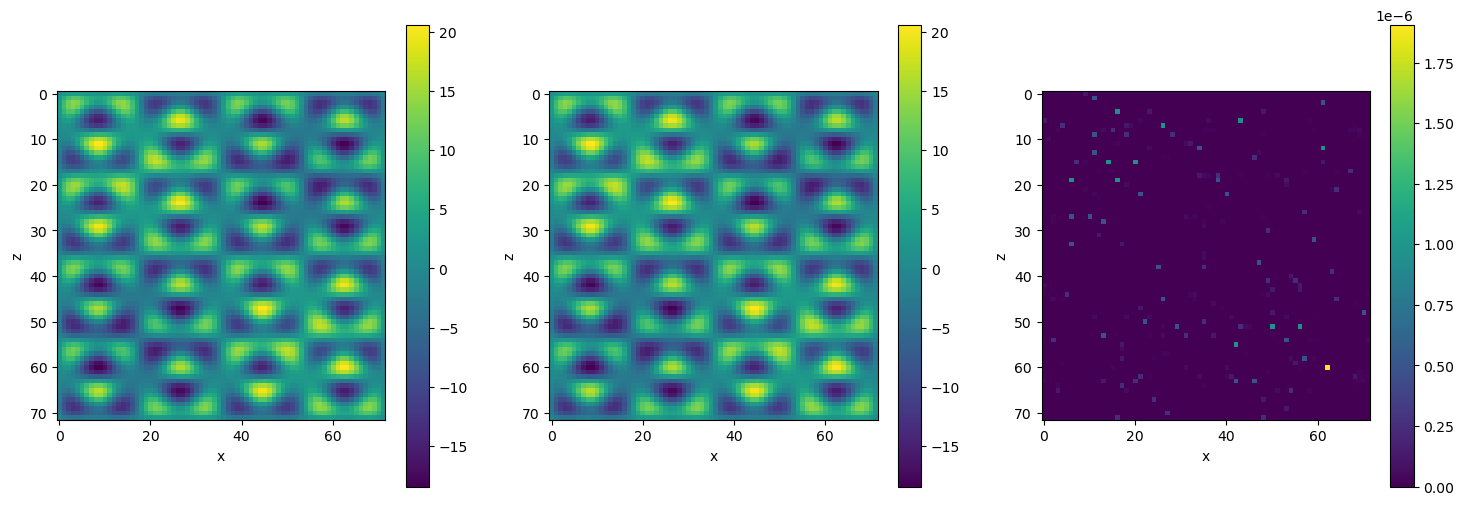

In [105]:
drdt_c2_multi = np.fromfile("../C2/build_multi/test_convection_masse/test_convection_masse_lata_1.sauv.lata.0.DRHO_DT", dtype=np.float32).reshape(ni, nj, nk, order="F")
drdt_c2_1_proc = np.fromfile("../C2/build_1_proc/test_convection_masse/test_convection_masse_lata_1.sauv.lata.0.DRHO_DT", dtype=np.float32).reshape(ni, nj, nk, order="F")

fig, ax = plt.subplots(1, 3, figsize=(6*3, 6))
channel_height = 8*nk//12

for a in ax:
    a.set_xlabel("x")
    a.set_ylabel("z")

channel_height = 3*nk//4
im0 = ax[0].imshow(drdt_c2_multi[..., channel_height].T)
im1 = ax[1].imshow(drdt_c2_1_proc[..., channel_height].T)
im3 = ax[2].imshow(np.abs(drdt_c2_multi[..., channel_height].T - drdt_c2_1_proc[..., channel_height].T))

fig.colorbar(im0, ax = ax[0])
fig.colorbar(im1, ax = ax[1])
fig.colorbar(im3, ax = ax[2])

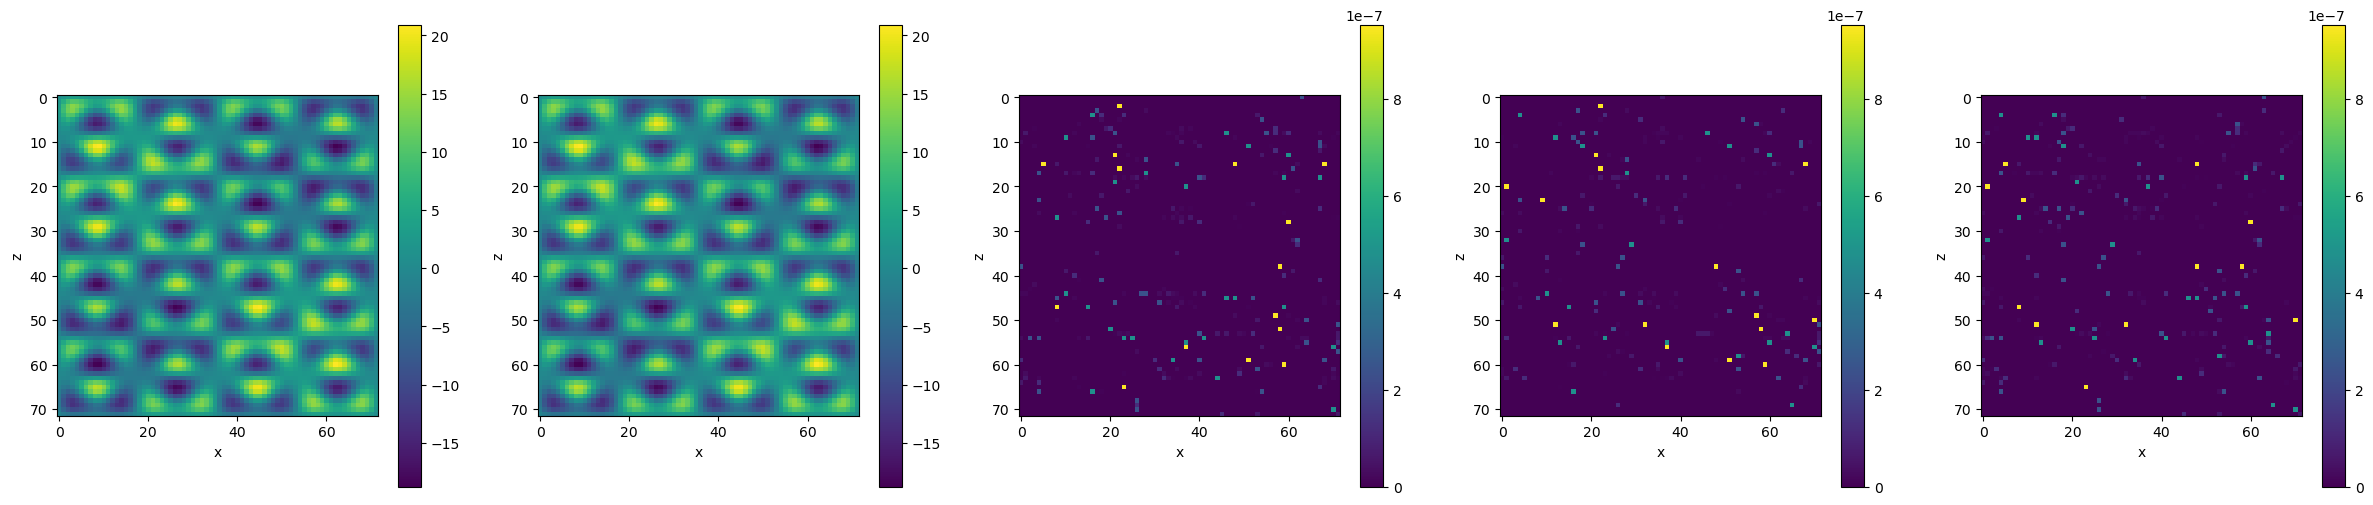

In [109]:
drdt_c2_multi = np.fromfile("../quick/build_multi/test_convection_masse/test_convection_masse_lata_1.sauv.lata.0.DRHO_DT", dtype=np.float32).reshape(ni, nj, nk, order="F")
drdt_c2_1_proc = np.fromfile("../quick/build_1proc/test_convection_masse/test_convection_masse_lata_1.sauv.lata.0.DRHO_DT", dtype=np.float32).reshape(ni, nj, nk, order="F")

fig, ax = plt.subplots(1, 5, figsize=(6*5, 6))
channel_height = 8*nk//12

for a in ax:
    a.set_xlabel("x")
    a.set_ylabel("z")

channel_height = 3*nk//4
im0 = ax[0].imshow(drdt_c2_multi[..., channel_height].T)
im1 = ax[1].imshow(drdt_c2_1_proc[..., channel_height].T)
im2 = ax[2].imshow(np.abs(drdt_c2_multi[..., channel_height].T - drdt_c2_1_proc[..., channel_height].T))

im3 = ax[3].imshow(np.abs(drdt_c2_multi[..., channel_height] - drdt_true[..., channel_height]).T)
im4 = ax[4].imshow(np.abs(drdt_c2_1_proc[..., channel_height] - drdt_true[..., channel_height]).T)


fig.colorbar(im0, ax = ax[0])
fig.colorbar(im1, ax = ax[1])
fig.colorbar(im2, ax = ax[2])
fig.colorbar(im3, ax = ax[3])
fig.colorbar(im4, ax = ax[4])
